In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [56]:
lung_cancer = pd.read_csv("F:\project\Project\MDPS\Dataset\lung_cancer_examples.csv")

In [57]:
print('Dataset :',lung_cancer.shape)
lung_cancer.info()
lung_cancer[0:10]

Dataset : (59, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     59 non-null     object
 1   Surname  59 non-null     object
 2   Age      59 non-null     int64 
 3   Smokes   59 non-null     int64 
 4   AreaQ    59 non-null     int64 
 5   Alkhol   59 non-null     int64 
 6   Result   59 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 3.4+ KB


,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1
5,Cristiano,Ronaldo,34,0,10,0,0
6,Mihail,Tal,58,15,10,0,0
7,Kathy,Bates,22,12,5,2,0
8,Nicole,Kidman,45,2,6,0,0
9,Ray,Milland,52,18,4,5,1


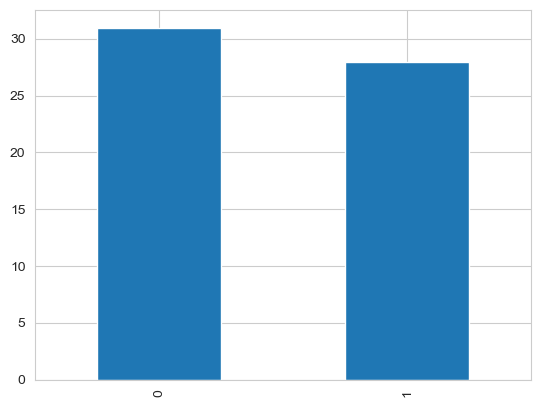

In [58]:
lung_cancer.Result.value_counts()[0:30].plot(kind='bar')
plt.show()

c:\Users\USER\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


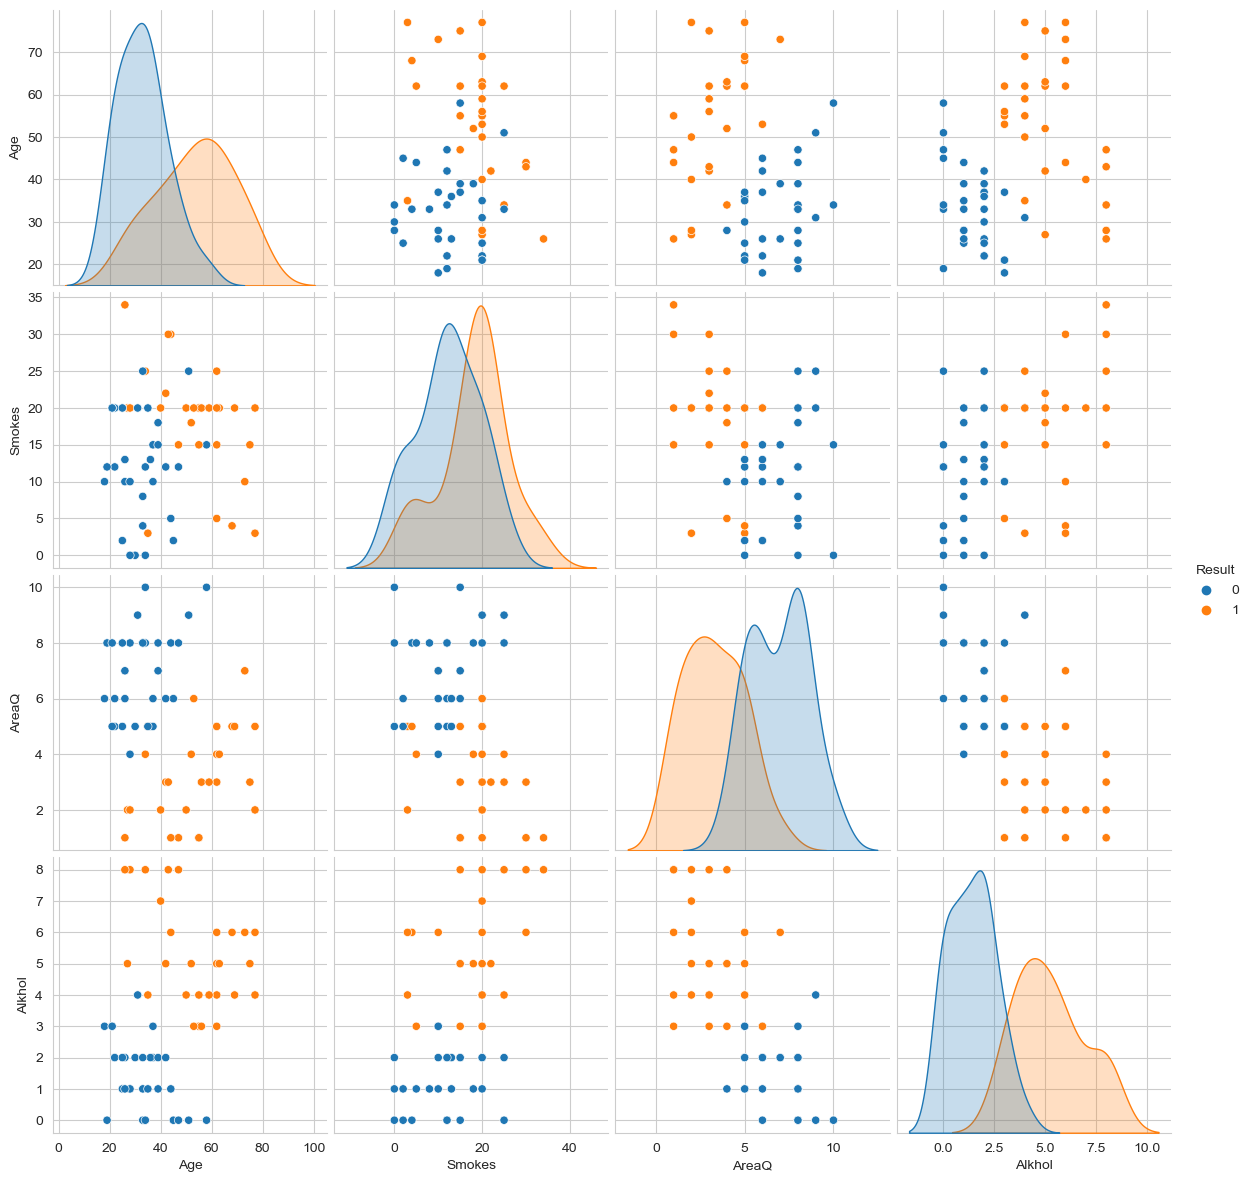

In [59]:
sns.set_style("whitegrid")
sns.pairplot(lung_cancer,hue="Result",size=3);
plt.show()

In [11]:
data1 = lung_cancer.drop(columns=['Name','Surname'],

                 axis=1)
data1 = data1.dropna(how='any')
print(data1.shape)

(59, 5)


In [12]:
print(data1.shape)
data1.head()

(59, 5)


,Age,Smokes,AreaQ,Alkhol,Result
0,35,3,5,4,1
1,27,20,2,5,1
2,30,0,5,2,0
3,28,0,8,1,0
4,68,4,5,6,1


In [13]:
from sklearn.model_selection import train_test_split
Y = data1['Result']
X = data1.drop(columns=['Result'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=9)

In [14]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)

X train shape:  (53, 4)
Y train shape:  (53,)
X test shape:  (6, 4)
Y test shape:  (6,)


In [17]:
from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix


# We define the SVM model
svmcla = OneVsRestClassifier(BaggingClassifier(SVC(C=10,kernel='rbf',random_state=9, probability=True), 
                                               n_jobs=-1))

# We train model
svmcla.fit(X_train, Y_train)

# We predict target values
Y_predict2 = svmcla.predict(X_test)

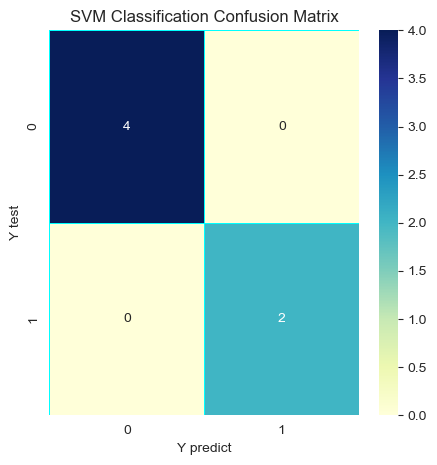

In [18]:
svmcla_cm = confusion_matrix(Y_test, Y_predict2)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(svmcla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('SVM Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()


In [19]:
score_svmcla = svmcla.score(X_test, Y_test)
print(score_svmcla)

1.0


In [20]:
Testscores = pd.Series([score_svmcla], 
                        index=['Support Vector Machine Score']) 
print(Testscores)

Support Vector Machine Score    1.0
dtype: float64


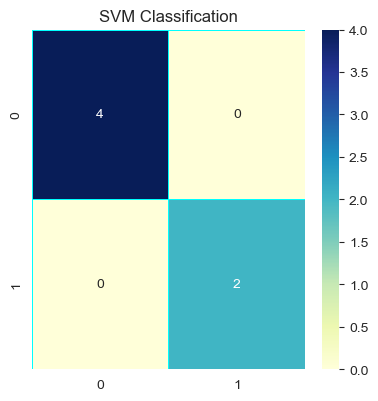

In [21]:
fig = plt.figure(figsize=(15,15))
ax2 = fig.add_subplot(3, 3, 2) 
ax2.set_title('SVM Classification')
sns.heatmap(data=svmcla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax2) 
plt.show()

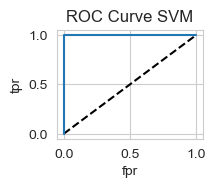

In [22]:
from sklearn.metrics import roc_curve
Y_predict2_proba = svmcla.predict_proba(X_test)
Y_predict2_proba = Y_predict2_proba[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_predict2_proba)
plt.subplot(332)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve SVM')
plt.grid(True)
plt.show()

In [23]:
Y1 = data1['Result']
X1 = data1.drop(columns=['Age'])
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.06, penalty="l1", dual=False,random_state=10).fit(X1, Y1)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X1)
cc = list(X1.columns[model.get_support(indices=True)])
print(cc)
print(len(cc))

['Smokes', 'AreaQ', 'Alkhol']
3


c:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


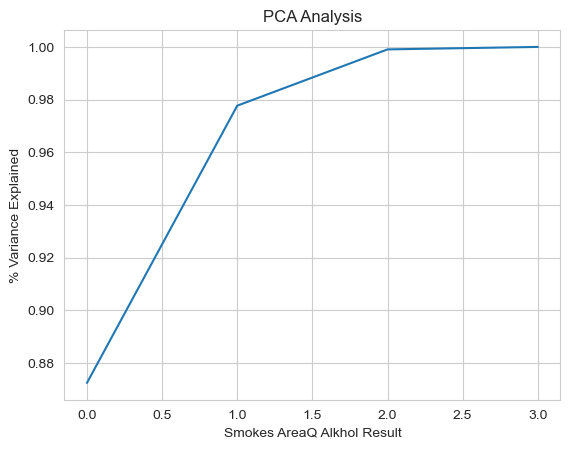

In [24]:
from sklearn.decomposition import PCA

pca = PCA().fit(X1)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Smokes AreaQ Alkhol Result')
plt.ylabel('% Variance Explained')
plt.title('PCA Analysis')
plt.grid(True)
plt.show()

In [25]:
variance = pd.Series(list(np.cumsum(pca.explained_variance_ratio_)), 
                        index= list(range(1,5))) 
print(variance[10:90])

Series([], dtype: float64)


In [26]:
X1 = data1[cc] 
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.1, random_state=10)

In [27]:
svmcla.fit(X1_train, Y1_train)
Y1_predict2 = svmcla.predict(X1_test)
svmcla_cm = confusion_matrix(Y1_test, Y1_predict2)
score1_svmcla = svmcla.score(X1_test, Y1_test)

In [28]:
Y1 = data1['Result']
X1 = data1.drop(columns=['AreaQ'])
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.06, penalty="l1", dual=False,random_state=10).fit(X1, Y1)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X1)
cc = list(X1.columns[model.get_support(indices=True)])
print(cc)
print(len(cc))

['Age', 'Smokes', 'Alkhol', 'Result']
4


c:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


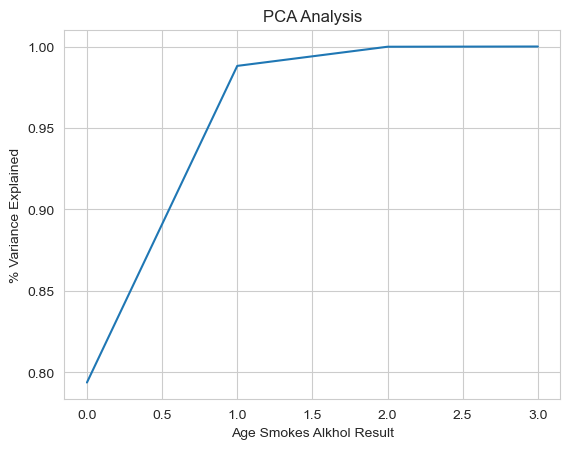

In [29]:
from sklearn.decomposition import PCA

pca = PCA().fit(X1)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Age Smokes Alkhol Result')
plt.ylabel('% Variance Explained')
plt.title('PCA Analysis')
plt.grid(True)
plt.show()

In [30]:
variance = pd.Series(list(np.cumsum(pca.explained_variance_ratio_)), 
                        index= list(range(1,5))) 
print(variance[10:90])

Series([], dtype: float64)


In [31]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.1, random_state=10)

In [32]:
svmcla.fit(X1_train, Y1_train)
Y1_predict2 = svmcla.predict(X1_test)
svmcla_cm = confusion_matrix(Y1_test, Y1_predict2)
score1_svmcla = svmcla.score(X1_test, Y1_test)

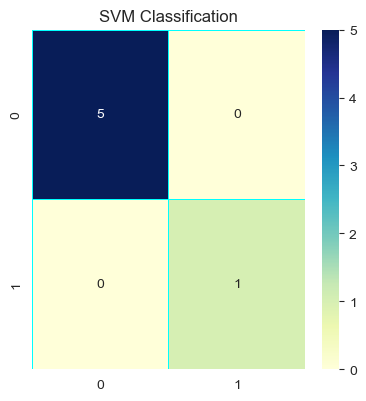

In [34]:
fig = plt.figure(figsize=(15,15))

ax2 = fig.add_subplot(3, 3, 2) 
ax2.set_title('SVM Classification')

sns.heatmap(data=svmcla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax2)  

plt.show()

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3, stratify = Y)

In [36]:
print(X.shape, X_train.shape, X_test.shape)

(59, 4) (47, 4) (12, 4)


In [40]:
from sklearn import svm
classifier = svm.SVC(kernel='linear')

In [41]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [42]:
from sklearn.metrics import accuracy_score
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [43]:
print("Accuracy score of the training data is: ", training_data_accuracy)

Accuracy score of the training data is:  1.0


In [44]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [45]:
print("Accuracy score of the test data is: ", test_data_accuracy)

Accuracy score of the test data is:  0.9166666666666666


In [36]:
test_data_accuracy = round(accuracy_score(X_test_prediction, Y_test)*100,2)

print("Accuracy on Test Data: ", test_data_accuracy)

Accuracy on Test Data:  90.32


In [51]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to your training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform your test data using the same scaler
X_test_scaled = scaler.transform(X_test)
input_data = (18,10,6,3)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
std_data = scaler.transform(input_data_reshaped)
print(std_data)
prediction = classifier.predict(std_data)
print(prediction)
if (prediction[0] == 0):
    print("The Person is non-diabetic")
else:
    print("The person is diabetic")

[[-1.64157868 -0.6884063   0.35983816 -0.08216523]]
[0]
The Person is non-diabetic


c:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [38]:
print("Mean Squared Error: ", (mean_squared_error(Y_test, X_test_prediction)))

Mean Squared Error:  0.0967741935483871


In [39]:
print("Median Absolute Error: ", (median_absolute_error(Y_test, X_test_prediction)))

Median Absolute Error:  0.0


In [40]:
print("F1 Score: ", (f1_score(Y_test, X_test_prediction)))

F1 Score:  0.9464285714285714


In [50]:
input_values = (74,2,1,1,1,2,2,2,1,1,1,2,2,2)

input_values_as_numpy_array = np.asarray(input_values)
input_values_reshaped = input_values_as_numpy_array.reshape(1,-1)


prediction = model.predict(input_values_reshaped)
print(prediction)

if (prediction[0] == 0):
    print("This Person has not Lung Cancer.")
else:
    print("This Preson has Lung Cancer.")
    

[1]
This Preson has Lung Cancer.


c:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [42]:
import pickle

In [43]:
filename = "lung_cancer_model.sav"
pickle.dump(model, open(filename, "wb"))

In [44]:
loaded_model = pickle.load(open("lung_cancer_model.sav", "rb"))

In [45]:
#input_values =(56,2,2,2,1,1,1,1,1,1,1,2,2,1)
input_values = (61,2,2,2,1,1,2,2,1,2,1,2,2,2)

input_values_as_numpy_array = np.asarray(input_values)
input_values_reshaped = input_values_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_values_reshaped)
print(prediction)

if (prediction[0] == 0):
    print("This Person has not Lung Cancer.")
else:
    print("This Preson has Lung Cancer.")

[1]
This Preson has Lung Cancer.
